In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.io import loadmat
from utils import initialize_centroids, run_kmeans, plot_progress_kmeans, plot_data_points, draw_line, compute_centroids, find_closest_centroids

In [3]:
data = loadmat('data/ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
X = data['X']
X.shape

(300, 2)

In [5]:
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids.shape

(3, 2)

In [6]:
idx = find_closest_centroids(X, initial_centroids)

idx[0:3]

array([0, 2, 1])

In [7]:
centroids = compute_centroids(X, idx, K)

In [8]:
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
data = loadmat('data/ex7data2.mat')
print(data.keys())

X = data['X']
print("X.shape", X.shape)

K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

dict_keys(['__header__', '__version__', '__globals__', 'X'])
X.shape (300, 2)


In [10]:
import matplotlib.pyplot as plt

K-means iteration 1/10 ....
K-means iteration 2/10 ....
K-means iteration 3/10 ....
K-means iteration 4/10 ....
K-means iteration 5/10 ....
K-means iteration 6/10 ....
K-means iteration 7/10 ....
K-means iteration 8/10 ....
K-means iteration 9/10 ....
K-means iteration 10/10 ....


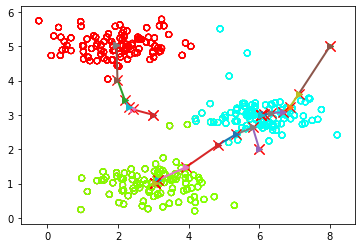

In [11]:
centroids, idx = run_kmeans(X, initial_centroids, max_iters, True)

# K-Means Clustering on Pixels

In [12]:
img = plt.imread('data/bird_small.png')

img = img / 255.  # Divide by 255 so that all values are in the range 0 - 1

row, col, height = img.shape

In [13]:
X = np.reshape(img, (row*col, height), order='F')
X.shape

(16384, 3)

In [14]:
K = 16
max_iters = 20
initial_centroids = initialize_centroids(X, K)

In [ ]:
# centroids, _ = run_kmeans(X, initial_centroids, max_iters)
centroids, _ = runKMeans(X, initial_centroids, max_iters, False)

Running 0


c:\users\kene\desktop\mlfromscratch\mls_env\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\kene\desktop\mlfromscratch\mls_env\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Running 1


# Image Compression

In [ ]:
idx = find_closest_centroids(X, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, (row, col, height), order='F')

In [42]:
# fig, ax = plt.subplot((1, 2, 1))

In [33]:
data = loadmat('data/ex7data2.mat')
print(data.keys())

X = data['X']
print("X.shape", X.shape)

K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

dict_keys(['__header__', '__version__', '__globals__', 'X'])
X.shape (300, 2)


In [25]:
def findClosestCentroids(X,initial_centroids):
    m = X.shape[0]
    K = initial_centroids.shape[0]
    dis = np.zeros((m,K))
    idx = np.zeros((m,1))
    
    for i in range(m):
        for j in range(K):
            dis[i,j] = np.dot((X[i,:]-initial_centroids[j,:]).reshape(1,-1),(X[i,:]-initial_centroids[j,:]).reshape(-1,1))
            
    dummy,idx = np.where(dis == np.min(dis, axis=1).reshape(-1,1))
    return idx[0:dis.shape[0]]

In [26]:
def computerCentroids(X,idx,K):
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.ravel(idx==i),:], axis=0).reshape(1,-1)
    return centroids

In [27]:
def runKMeans(X,initial_centroids,max_iters,plot_process):
    m,n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    
    for i in range(max_iters):
        print("Running",  i)
        idx = findClosestCentroids(X, centroids)
        if plot_process:
            plt = plotProcessKMeans(X,centroids,previous_centroids)
            previous_centroids = centroids
        centroids = computerCentroids(X, idx, K)
    if plot_process:
        plt.show()
    return centroids,idx

In [28]:
def plotProcessKMeans(X,centroids,previous_centroids):
    plt.scatter(X[:,0], X[:,1])
    plt.plot(previous_centroids[:,0],previous_centroids[:,1],'rx',markersize=10,linewidth=5.0)
    plt.plot(centroids[:,0],centroids[:,1],'rx',markersize=10,linewidth=5.0)
    for j in range(centroids.shape[0]):
        p1 = centroids[j,:]
        p2 = previous_centroids[j,:]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],"->",linewidth=2.0)
    return plt

In [29]:
def kMeansInitCentroids(X,K):
    m = X.shape[0]
    m_arr = np.arange(0,m)
    centroids = np.zeros((K,X.shape[1]))
    np.random.shuffle(m_arr) 
    rand_indices = m_arr[:K]
    centroids = X[rand_indices,:]
    return centroids

Running 0
Running 1
Running 2
Running 3
Running 4
Running 5
Running 6
Running 7
Running 8
Running 9


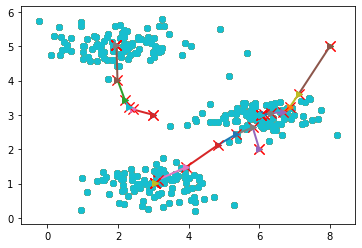

In [39]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters = 10
jj, kk = runKMeans(X,initial_centroids,max_iters,True)